#**პრაქტიკული დავალება #6**
## **ვადა (deadline): 21 ივნისი 9:00AM**

- თითოეული სავარჯიშო ფასდება შესაბამისი ქულით, რაც ჯამში შეადგენს **7 ქულას**

**პრობლემის აღწერა:**
ავიაკომპანიები ცდილობენ გააუმჯობესონ მომხმარებელთა კმაყოფილება, რათა შეინარჩუნონ კლიენტები და გაზარდონ ბრენდის ერთგულება. ათასობით მომხმარებლის ყოველდღიური ფრენის გათვალისწინებით, მნიშვნელოვანია მომხმარებელთა კმაყოფილების განმაპირობებელი ფაქტორების გაგება. ჩვენი მონაცემები შეიცავს ინფორმაციას მომხმარებელთა გამოცდილების სხვადასხვა ასპექტისა და მათი ზოგადი კმაყოფილების დონის შესახებ. ამ მონაცემების ანალიზით, ჩვენ უნდა გამოვავლინოთ მომხმარებელთა კმაყოფილების განმსაზღვრელი კანონზომიერებები.

**მიზანი:**
ავაგოთ მოდელი, რომელიც შეგვაძლებინებს დავაპროგნოზოთ, არის თუ არა მომხმარებელი კმაყოფილი ან უკმაყოფილო მათი ფრენის გამოცდილებასთან დაკავშირებული სხვადასხვა მახასიათებლების საფუძველზე. ეს მოდელი დაეხმარება ავიაკომპანიას პროაქტიულად მართოს ფაქტორები, რომლებიც იწვევენ უკმაყოფილებას და გააუმჯობესოს მომხმარებელთა ზოგადი კმაყოფილება.

**[მონაცემები:](https://drive.google.com/drive/folders/1TxMqaH4zYYQYlbsaw0kcMTXLQYXrgwCL?usp=drive_link)**
  - Airline_customer_satisfaction.csv - მონაცემები სამედიცინო ჩანაწერებიდან.
  - Airline_customer_satisfaction_desc.csv - ველების აღწერა.

**მეთოდები:**
  - გადაწყვეტილების ხე (Decision Tree)
  - შემთხვევითი ტყე (Random Forest)
  - გრადიენტ ბუსტინგი (Gradient Boosting)
  - XGBoost

**ᲘᲮᲔᲚᲛᲫᲦᲕᲐᲜᲔᲚᲔᲗ:** [ᲚᲔᲥᲪᲘᲐ 11: ᲒᲐᲜᲢᲝᲢᲕᲐᲓᲘ ᲛᲝᲓᲔᲚᲔᲑᲘ](https://drive.google.com/file/d/1qyr-XH91YTBMx6EVpSyjaqjWKRy3ngKc/view?usp=sharing)

In [1]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns

## **სავარჯიშო 1:** მონაცემების მომზადება (**1 ქულა**)
  - გაიმეორეთ [მე-5 დავალების](https://drive.google.com/file/d/15Btv6SN59yEfH9B0AkUNbVZVzkgn-wHj/view?usp=sharing) 1-4 სავარჯიშოების ნაბიჯები


In [2]:
df = pd.read_csv('data/Airline_customer_satisfaction.csv')

In [3]:
# მონაცემთა ფორმა
df.shape

(129880, 22)

In [4]:
# პირველი 5 მწკრივი
df.head()

,satisfaction,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,...,4,2,2,0,2,4,2,5,0,0.0


In [5]:
# გამოტოვებული მონაცემები მონაცემები
df.isnull().sum()

satisfaction                           0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Seat comfort                           0
Departure/Arrival time convenient      0
Food and drink                         0
Gate location                          0
Inflight wifi service                  0
Inflight entertainment                 0
Online support                         0
Ease of Online booking                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Cleanliness                            0
Online boarding                        0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
dtype: int64

In [6]:
# შევავსოთ გამოტოვებული მნიშვნლეობები მედიანით
df['Arrival Delay in Minutes'] = df['Arrival Delay in Minutes'].fillna(df['Arrival Delay in Minutes'].median())

In [7]:
# დუბლირებული მონაცემები
df.duplicated().sum()

0

In [8]:
# მონაცემთა ტიპები
df.dtypes

satisfaction                          object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Seat comfort                           int64
Departure/Arrival time convenient      int64
Food and drink                         int64
Gate location                          int64
Inflight wifi service                  int64
Inflight entertainment                 int64
Online support                         int64
Ease of Online booking                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Cleanliness                            int64
Online boarding                        int64
Departure Delay in Minutes             int64
Arrival Delay in Minutes             float64
dtype: obj

In [9]:
# დავაკონვერტიროთ satisfaction სვეტი ბინალურ ველად
df['satisfaction'] = df['satisfaction'].map({'dissatisfied': 0, 'satisfied': 1})

# კატეგორიული ველების one-hot კოდირება
categorical_columns = ['Customer Type', 'Type of Travel', 'Class']
df = pd.get_dummies(df, columns=categorical_columns)

In [10]:
# სვეტები რომლებიც საჭიროებს ნორმალიზებას
columns = ['Age', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']

# გამოვიყენოთ StandartScaler
scaler = StandardScaler()
df[columns] = scaler.fit_transform(df[columns])

In [11]:
# განვსაზღვროთ დამოკიდებული და დამოუკიდებელი ცვლადები
X = df.drop('satisfaction', axis=1)
y = df['satisfaction']

# გავყოთ მონაცემები სატესტო და სატრენინგო ნაწილებად
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# სატესტო და სატრენინგო მონაცემების ზომა
(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

((103904, 25), (25976, 25), (103904,), (25976,))

## **სავარჯიშო 2:** გადაწყვეტილების ხე (**1 ქულა**)
  - გაწვრთენით გადაწყვეტილების ხის მოდელი საწვრთნელი მონაცემებით.
  - გააკეთეთ პროგნოზები გაწვრთნილი მოდელის გამოყენებით სატესტო მონაცემებზე.


In [12]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# სატესტო სეტზე მოდელის პროგნოზირება
y_pred_dt = dt_model.predict(X_test)
y_pred_prob_dt = dt_model.predict_proba(X_test)[:, 1]

## **სავარჯიშო 3:** შემთხვევითი ტყე (**1 ქულა**)
  - გაწვრთენით შემთხვევითი ტყის მოდელი საწვრთნელი მონაცემებით.
  - გააკეთეთ პროგნოზები გაწვრთნილი მოდელის გამოყენებით სატესტო მონაცემებზე.


In [13]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# სატესტო სეტზე მოდელის პროგნოზირება
y_pred_rf = rf_model.predict(X_test)
y_pred_prob_rf = rf_model.predict_proba(X_test)[:, 1]

## **სავარჯიშო 4:** გრადიენტ ბუსტინგი (**1 ქულა**)
  - გაწვრთენით გრადიენტ ბუსტინგის მოდელი საწვრთნელი მონაცემებით.
  - გააკეთეთ პროგნოზები გაწვრთნილი მოდელის გამოყენებით სატესტო მონაცემებზე.


In [14]:
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)

# სატესტო სეტზე მოდელის პროგნოზირება
y_pred_gb = gb_model.predict(X_test)
y_pred_prob_gb = gb_model.predict_proba(X_test)[:, 1]

## **სავარჯიშო 5:** XGBoost (**1 ქულა**)
  - გაწვრთენით XGBoost მოდელი საწვრთნელი მონაცემებით.
  - გააკეთეთ პროგნოზები გაწვრთნილი მოდელის გამოყენებით სატესტო მონაცემებზე.

In [15]:
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)

# სატესტო სეტზე მოდელის პროგნოზირება
y_pred_xgb = xgb_model.predict(X_test)
y_pred_prob_xgb = xgb_model.predict_proba(X_test)[:, 1]

## **სავარჯიშო 6:** მოდელის შეფასება და შედეგების ვიზუალიზება (**1 ქულა**)

- გაიმეორეთ [მე-5 დავალების](https://drive.google.com/file/d/15Btv6SN59yEfH9B0AkUNbVZVzkgn-wHj/view?usp=sharing) 6-7 სავარჯიშოების ნაბიჯები ოთხივე მოდელისთვის




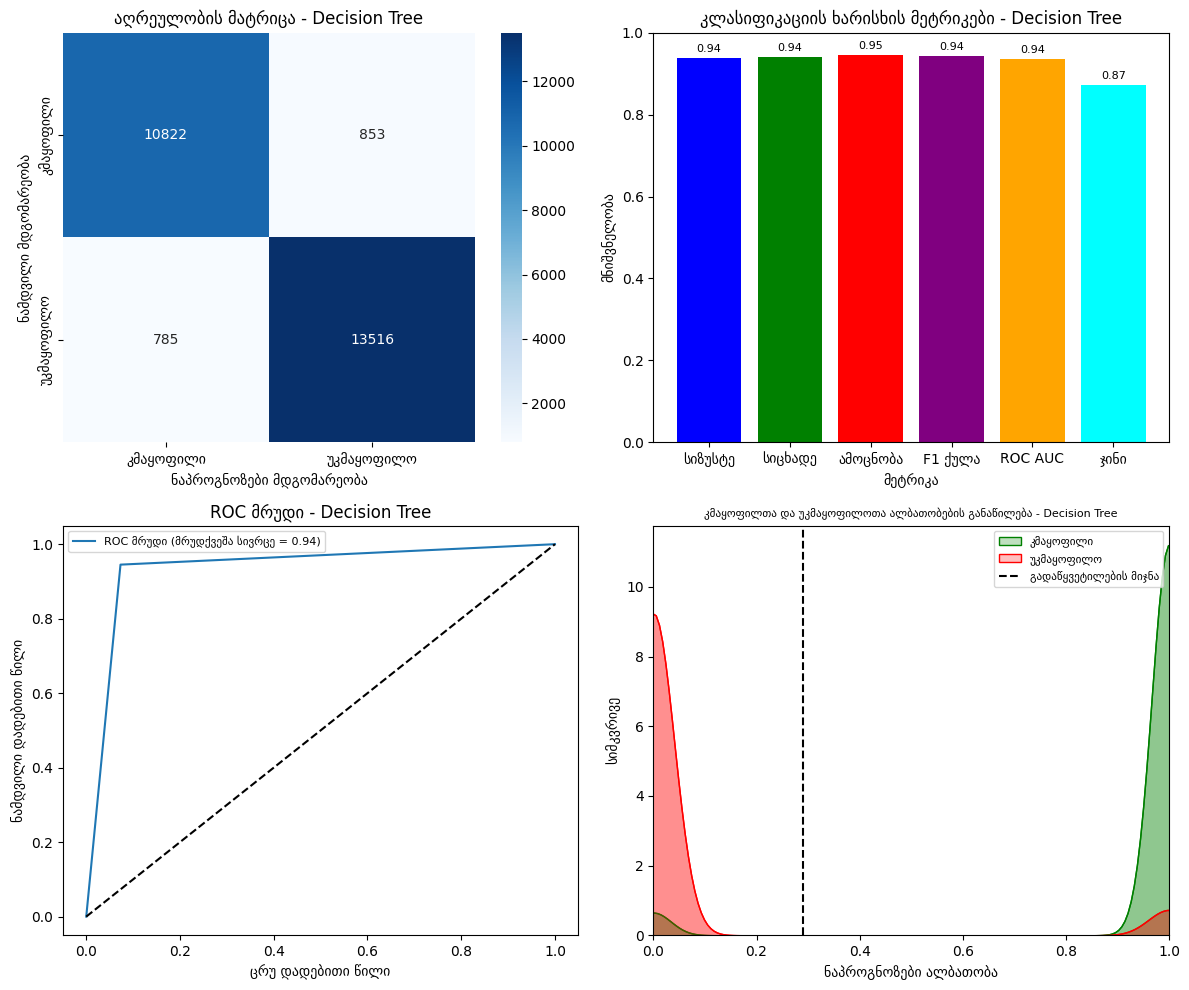

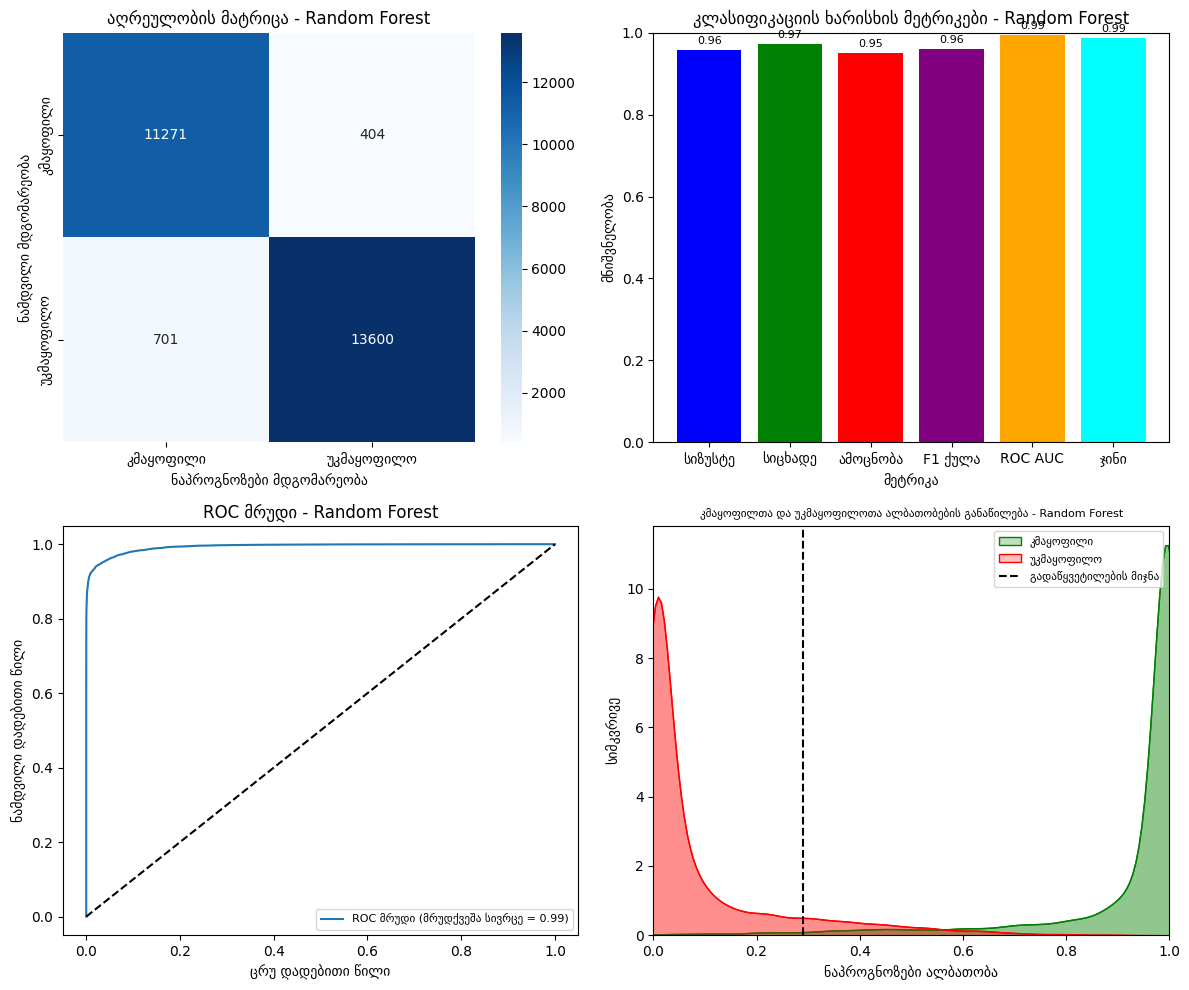

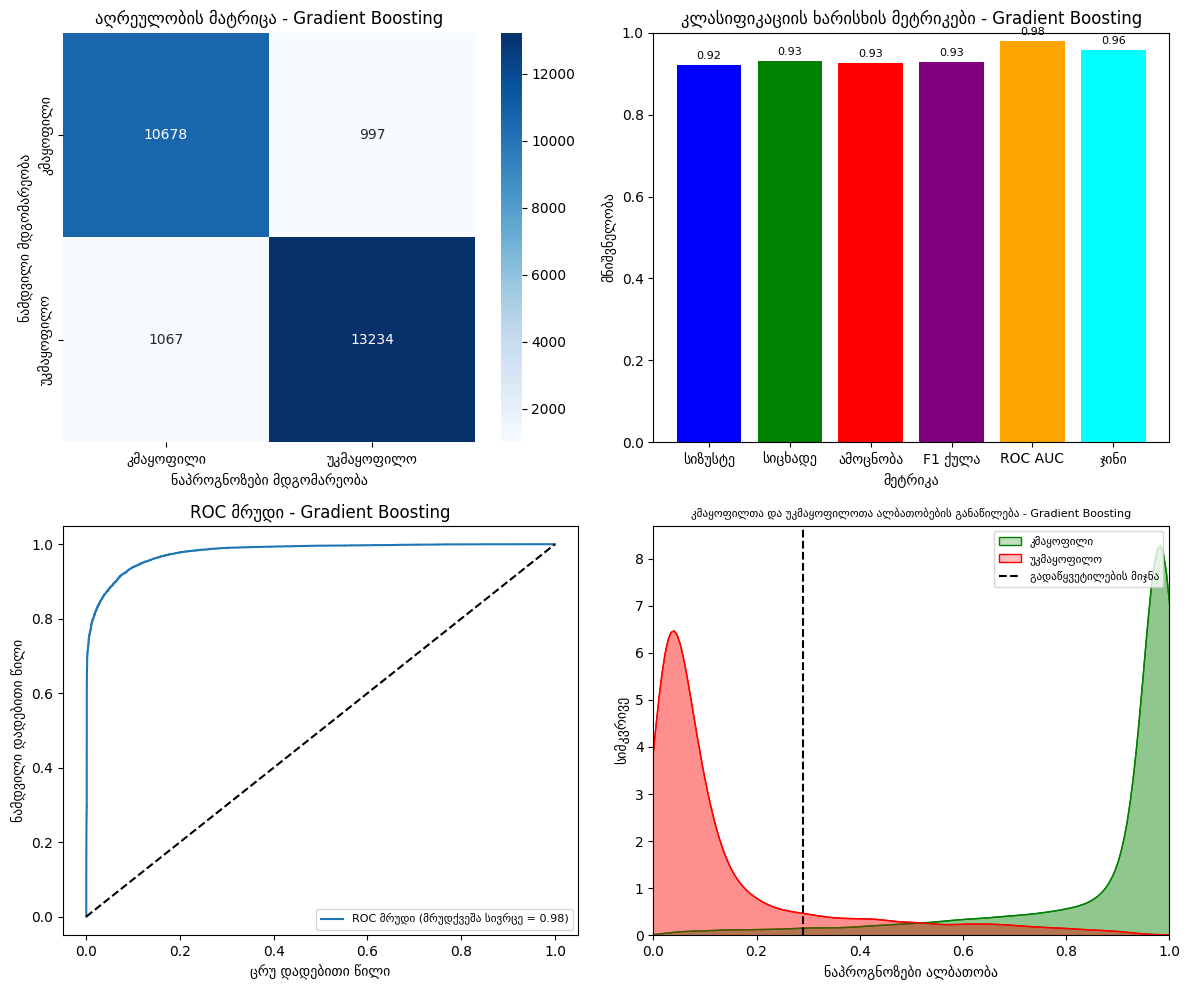

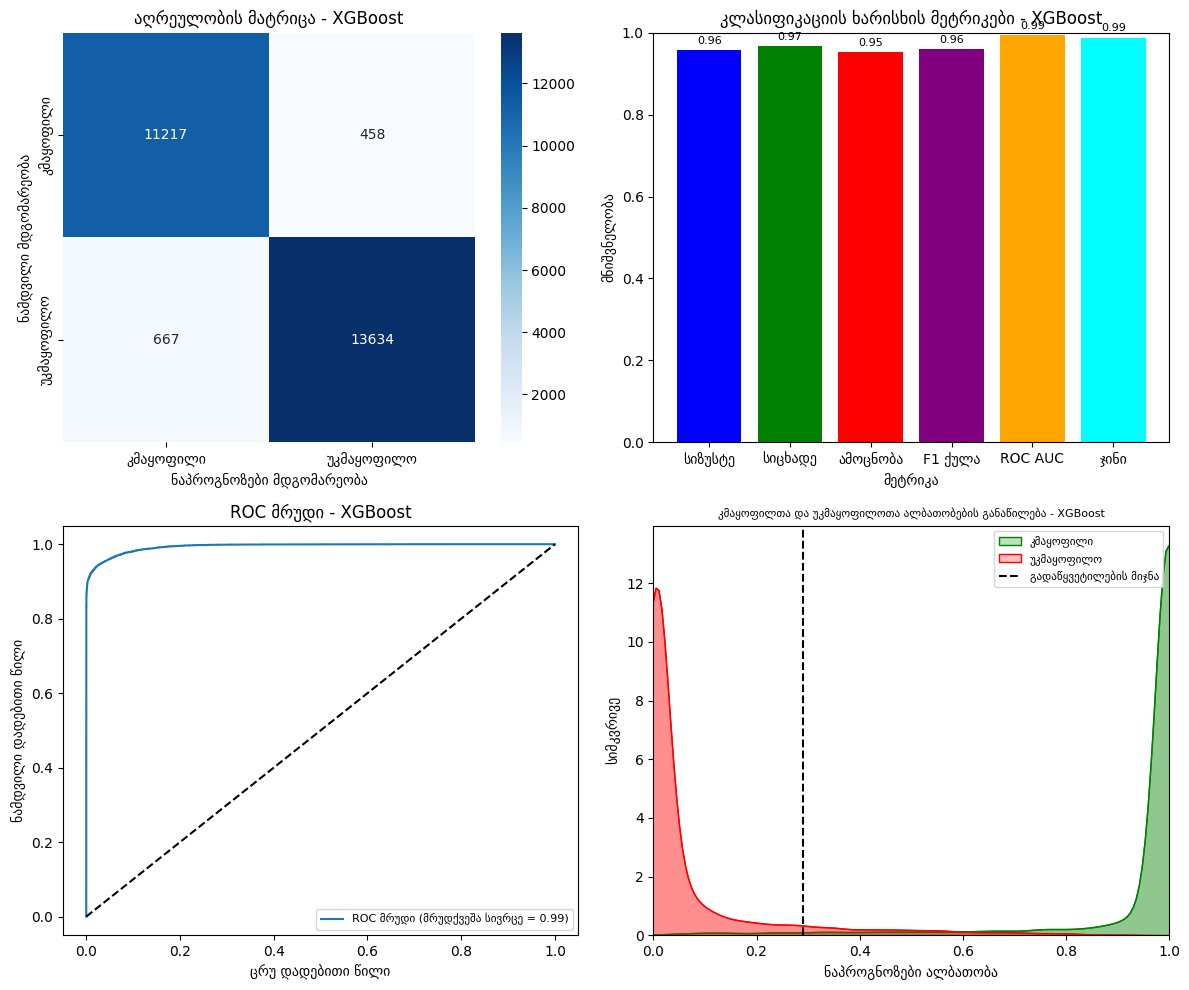

In [20]:

models = [
    ("Decision Tree", dt_model, y_pred_dt, y_pred_prob_dt),
    ("Random Forest", rf_model, y_pred_rf, y_pred_prob_rf),
    ("Gradient Boosting", gb_model, y_pred_gb, y_pred_prob_gb),
    ("XGBoost", xgb_model, y_pred_xgb, y_pred_prob_xgb)
]

for name, model, y_pred, y_pred_prob in models:
    
    # აღრეულობის მატრიცა და მეტრიკები
    cm = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_prob)
    gini_coefficient = 2 * roc_auc - 1
    
    # პლოტი
    fig, axs = plt.subplots(2, 2, figsize=(12, 10))  # Adjusting the figure size
    
    # აღრეულობის მატრიცის ვიზუალიზაცია
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', cbar=True,
                xticklabels=['კმაყოფილი', 'უკმაყოფილო'],
                yticklabels=['კმაყოფილი', 'უკმაყოფილო'], ax=axs[0, 0])
    axs[0, 0].set_xlabel('ნაპროგნოზები მდგომარეობა', fontsize=10)
    axs[0, 0].set_ylabel('ნამდვილი მდგომარეობა', fontsize=10)
    axs[0, 0].set_title(f'აღრეულობის მატრიცა - {name}', fontsize=12)
    
    # მეტრიკების bar ჩარტი
    metrics = ['სიზუსტე', 'სიცხადე', 'ამოცნობა', 'F1 ქულა', 'ROC AUC', 'ჯინი']
    values = [accuracy, precision, recall, f1, roc_auc, gini_coefficient]
    
    bars = axs[0, 1].bar(metrics, values, color=['blue', 'green', 'red', 'purple', 'orange', 'cyan'])
    axs[0, 1].set_ylim(0, 1)
    axs[0, 1].set_xlabel('მეტრიკა', fontsize=10)
    axs[0, 1].set_ylabel('მნიშვნელობა', fontsize=10)
    axs[0, 1].set_title(f'კლასიფიკაციის ხარისხის მეტრიკები - {name}', fontsize=12)

    
    # ყოველ სვეტზე მნიშვნელობის დამატება
    for bar in bars:
        yval = bar.get_height()
        axs[0, 1].text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 2), ha='center', va='bottom', fontsize=8)
    
    # ROC მრუდი
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    axs[1, 0].plot(fpr, tpr, label=f'ROC მრუდი (მრუდქვეშა სივრცე = {roc_auc:.2f})')
    axs[1, 0].plot([0, 1], [0, 1], 'k--')
    axs[1, 0].set_xlabel('ცრუ დადებითი წილი', fontsize=10)
    axs[1, 0].set_ylabel('ნამდვილი დადებითი წილი', fontsize=10)
    axs[1, 0].set_title(f'ROC მრუდი - {name}', fontsize=12)
    axs[1, 0].legend(loc='best', fontsize=8)
    
    # ხდომილებათა ალბათობის სიმკვრივის ფუნქციები
    clipped_probs = np.clip(y_pred_prob, 0, 1)
    satisfaction_probs = clipped_probs[y_test == 1]
    non_satisfaction_probs = clipped_probs[y_test == 0]
    
    sns.kdeplot(satisfaction_probs, label='კმაყოფილი', color='green', fill=True, ax=axs[1, 1])
    sns.kdeplot(non_satisfaction_probs, label='უკმაყოფილო', color='red', fill=True, ax=axs[1, 1])

    # გადაწყვეტილების მიჯნა
    cutoff = 0.29

    # მრუდების ქვეშ სივრცის გაფერადება
    satisfaction_kde = sns.kdeplot(satisfaction_probs, color='green', fill=True, ax=axs[1, 1]).get_lines()
    non_satisfaction_kde = sns.kdeplot(non_satisfaction_probs, color='red', fill=True, ax=axs[1, 1]).get_lines()
    
    if satisfaction_kde and non_satisfaction_kde:
        satisfaction_x, satisfaction_y = satisfaction_kde[0].get_data()
        non_satisfaction_x, non_satisfaction_y = non_satisfaction_kde[0].get_data()
        
        axs[1, 1].fill_between(satisfaction_x, satisfaction_y, where=(satisfaction_x > cutoff) & (satisfaction_y >= non_satisfaction_y), color='green', alpha=0.85, label='ნამდვილი კმაყოფილი')
        axs[1, 1].fill_between(non_satisfaction_x, non_satisfaction_y, where=(non_satisfaction_x > cutoff) & (non_satisfaction_y <= satisfaction_y), color='red', alpha=0.85, label='ცრუ კმაყოფილი')
    
    axs[1, 1].axvline(cutoff, color='black', linestyle='--', linewidth=1.5, label='გადაწყვეტილების მიჯნა')
    axs[1, 1].set_xlabel('ნაპროგნოზები ალბათობა', fontsize=10)
    axs[1, 1].set_ylabel('სიმკვრივე', fontsize=10)
    axs[1, 1].set_xlim(0, 1)
    axs[1, 1].set_title(f'კმაყოფილთა და უკმაყოფილოთა ალბათობების განაწილება - {name}', fontsize=8)
    axs[1, 1].legend(fontsize=8)
    
    plt.tight_layout()
    plt.show()

## **სავარჯიშო 7:** 5 მოდელის შედეგების შედარება (**1 ქულა**)

შეადარეთ ლოგისტიკური რეგრესიის, გადაწყვეტილების ხის, შეთხვევითი ტყის, გრადიენტ ბუსტინგის და XGBoost-ის მოდელები:
  - რომელს ანიჭებთ უპირატესობას და რატომ?

თითოეულმა მოდელის შედეგებმა შესანიშნავი მაჩვენებლები აჩვენა და მათ შორის დიდი განსხვავება არ არის (გარდა ლოგისტიკური რეგრესიისა , ხოლო ხის ბაზაზე დაფუძნებული მოდელები გვანან ერთმანეთს). ყველა მათგანს(ხის მოდელებს) აქვს ძალიან მაღალი სიზუსტე, სიცხადე, მგრძნობელობა, F1 ქულა, ROC AUC და ჯინის კოეფიციენტი. ეს მონაცემები აჩვენებს, რომ ყველა მოდელი ძალიან კარგია კლასიფიკაციის ამ ამოცანაზე და კარგად ართმევს მას თავს. 

იმი გათვალისწინებით რომ XGBoost  ზოგადად უფრო კომპლექსურია და უკეთესია უფრო რთულ მონაცემებზე. ამ შემთხვევაშიც კარგად გაართვა თავი დაკისრებულ ამოცანას და საუკეტესო შედეგი სწორედ მან გვაჩვენა,შემთხვევითობის ხესთან ერთად(random forest). იდენტური შედეგების გათვალსიენბით მე ავირჩევდი randomforest ს რადგან მარტივი და სწრაფი ტრენინგის პროცესის საშუალება გვექნება რაც ჩვენს ბიუჯეტსაც წაააეწევა. ხოლო თუ მეტი სიზუსტე გვჭირდება xgboost უკეთესი ვაირნატი იქნება თავისივე ჰიპერპარამეტრების tunin ის შემდეგ რაც მცირეოდნ გაზრდის სიზუსტის მაცვენებელს,მაგრამ ეს ჩვენს ჯიბესაც დაეტყობა